#### Using decision trees from scikit-learn for categorical data
using vertebrate data set

Abhilash Menon

In [2]:
# to visualize anything using matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
data = pd.read_csv('vertebrate.csv')

In [4]:
# List of all classes
data['Class Label']

0        mammal
1       reptile
2          fish
3        mammal
4     amphibian
5       reptile
6        mammal
7          bird
8        mammal
9          fish
10      reptile
11         bird
12       mammal
13         fish
14    amphibian
15          NaN
Name: Class Label, dtype: object

In [5]:
# List of unique classes
data['Class Label'].unique()

array(['mammal', 'reptile', 'fish', 'amphibian', 'bird', nan], dtype=object)

In [6]:
# Number of entries for each unique classes
class_group = data.groupby('Class Label').apply(lambda x: len(x))
class_group

Class Label
amphibian    2
bird         2
fish         3
mammal       5
reptile      3
dtype: int64

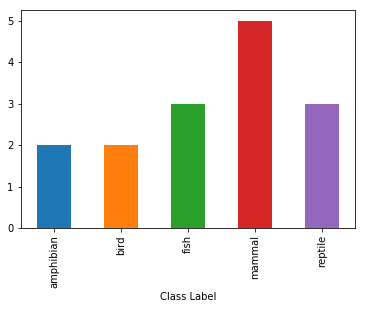

In [7]:
# Plot bar chart based on Class Label
class_group.plot(kind='bar', grid=False)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['Body Temperature', 'Skin Cover', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature', 'Has Legs', 'Hibernates']

X_feature = data[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

# print the features
# vect.get_feature_names()

# 0 to 14 is train set
X_Train = X_vector[:-1]
# 15th is test set
X_Test = X_vector[-1:] 

# Used to vectorize the class label
le = LabelEncoder()
y_train = le.fit_transform(data['Class Label'][:-1])

In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [16]:
# Predict the test data, not seen earlier
le.inverse_transform(clf.predict(X_Test))

array(['reptile'], dtype=object)

In [17]:
# prediction with the same training set
Train_predict = clf.predict(X_Train)

In [18]:
# The model predicted the training set correctly
(Train_predict == y_train).all()

True

In [20]:
# Metrics related to the DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print ('Accuracy is:', accuracy_score(y_train, Train_predict))
print (classification_report(y_train, Train_predict))

Accuracy is: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         5
          4       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        15



In [21]:
'''
import pydot
import pyparsing

import StringIO
dot_data = StringIO.StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('data/vertebrate/tree.png') 
from IPython.core.display import Image 
Image(filename='data/vertebrate/tree.png')
'''

"\nimport pydot\nimport pyparsing\n\nimport StringIO\ndot_data = StringIO.StringIO() \ntree.export_graphviz(clf, out_file=dot_data) \ngraph = pydot.graph_from_dot_data(dot_data.getvalue()) \ngraph.write_png('data/vertebrate/tree.png') \nfrom IPython.core.display import Image \nImage(filename='data/vertebrate/tree.png')\n"